# Project - Fake News Detection

In [1]:
# import neccesary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# DataFrame
true=pd.read_csv('True.csv')
fake=pd.read_csv('Fake.csv')

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
true.shape
# 21417 rows and 4 columns

(21417, 4)

In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fake.shape
# 23481 rows and 4 columns

(23481, 4)

In [7]:
# Label data 
true['label'] = 1
fake['label'] = 0

In [8]:
# Combine the data true news and false news
data = [true.loc[:15000][:], fake.loc[:17000][:]]

In [9]:
# Make dataframe of data
df = pd.concat(data)

In [10]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [11]:
df.shape

(32002, 5)

### Check for null values

In [12]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

Inference - No null values

### Check for duplicate data

In [13]:
df.duplicated().sum()

178

In [14]:
# Drop duplicate value
df=df.drop_duplicates()
df.duplicated().sum()

0

Inference - All duplicate data droped

### Randomly Shuffle rows

In [15]:
df=df.sample(frac = 1)

### Data Preprocessing

In [16]:
# Text Preprocessing
def text_summ(text):
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [17]:
df['text'] = df['text'].apply(text_summ)

In [18]:
df.head()

,title,text,subject,date,label
8667,Rachel Maddow CRUSHES The GOP Fantasy That Re...,Republicans have revived an old and overused p...,News,"January 19, 2016",0
1468,KKK Style Mob Chants “Russia Is Our Friend” W...,In a scene reminiscent of a horrifying KKK ral...,News,"May 14, 2017",0
12201,RICK SANTORUM INFURIATES LIBERALS After He Tel...,What do you think Do you agree with Rick Sant...,politics,"Dec 7, 2016",0
13949,Russia takes Tokyo to task over defense allian...,MOSCOW Reuters Russia is concerned that Ja...,worldnews,"November 24, 2017",1
16780,AUSTRIAN JUSTICE SYSTEM Gives Teen With Homema...,Before we get too far into this story it need...,Government News,"Feb 6, 2016",0


In [19]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

Drop columns which not helpful 

In [20]:
df=df.drop(['title','subject','date'], axis = 1)

In [21]:
df.reset_index(inplace=True)
df.head()

,index,text,label
0,8667,Republicans have revived an old and overused p...,0
1,1468,In a scene reminiscent of a horrifying KKK ral...,0
2,12201,What do you think Do you agree with Rick Sant...,0
3,13949,MOSCOW Reuters Russia is concerned that Ja...,1
4,16780,Before we get too far into this story it need...,0


### Model Building

In [22]:
x = df['text']
y = df['label']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
# Splitting the datas
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xvector_train = vectorization.fit_transform(x_train)
xvector_test = vectorization.transform(x_test)

### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(random_state = 0)
RandomForest.fit(xvector_train, y_train)

RandomForestClassifier(random_state=0)

In [27]:
pred_rf = RandomForest.predict(xvector_test)

In [28]:
RandomForest.score(xvector_test, y_test)

0.9865510306686778

In [29]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4227
           1       0.98      0.99      0.99      3729

    accuracy                           0.99      7956
   macro avg       0.99      0.99      0.99      7956
weighted avg       0.99      0.99      0.99      7956



### Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(xvector_train, y_train)

DecisionTreeClassifier()

In [31]:
pred_dt = DecisionTree.predict(xvector_test)

In [32]:
DecisionTree.score(xvector_test, y_test)

0.9959778783308195

In [33]:
print (classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4227
           1       1.00      1.00      1.00      3729

    accuracy                           1.00      7956
   macro avg       1.00      1.00      1.00      7956
weighted avg       1.00      1.00      1.00      7956



## Naive Bayes Classifier

In [34]:
from sklearn.naive_bayes import MultinomialNB
NaiveBayes = MultinomialNB()

In [35]:
NaiveBayes.fit(xvector_train, y_train)
pred_nb = NaiveBayes.predict(xvector_test)

In [36]:
NaiveBayes.score(xvector_test, y_test)

0.9317496229260935

In [37]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4227
           1       0.93      0.92      0.93      3729

    accuracy                           0.93      7956
   macro avg       0.93      0.93      0.93      7956
weighted avg       0.93      0.93      0.93      7956



# XGBoost

In [38]:
from xgboost import XGBClassifier

In [39]:
XGB = XGBClassifier()
XGB.fit(xvector_train, y_train)
pred_xgb = XGB.predict(xvector_test)

In [40]:
# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, pred_xgb))

XGBoost Accuracy: 0.9981146304675717


In [41]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4227
           1       1.00      1.00      1.00      3729

    accuracy                           1.00      7956
   macro avg       1.00      1.00      1.00      7956
weighted avg       1.00      1.00      1.00      7956



# Testing model

In [42]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "True News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(text_summ)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_DT = DecisionTree.predict(new_xv_test)
    
    return print("\n\nDT Prediction: {} ".format(output_lable(pred_DT[0])))
                                                                                                             
                                                                                                            
                        

In [43]:
news = str(input()) 


Trump says Russia probe will be fair, but timeline unclear: NYT","WEST PALM BEACH, Fla (Reuters) - President Donald Trump said on Thursday he believes he will be fairly treated in a special counsel investigation into Russian meddling in the U.S. presidential election, but said he did not know how long the probe would last. The federal investigation has hung over Trump’s White House since he took office almost a year ago, and some Trump allies have in recent weeks accused the team of Justice Department Special Counsel Robert Mueller of being biased against the Republican president. But in an interview with the New York Times, Trump appeared to shrug off concerns about the investigation, which was prompted by U.S. intelligence agencies’ conclusion that Russia tried to help Trump defeat Democrat Hillary Clinton by hacking and releasing embarrassing emails and disseminating propaganda. “There’s been no collusion. But I think he’s going to be fair,” Trump said in what the Times described as

In [45]:
manual_testing(news)



DT Prediction: True News 


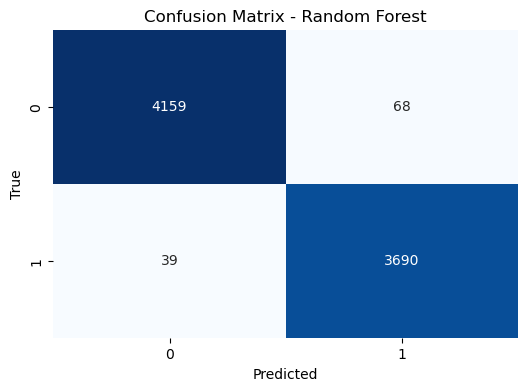

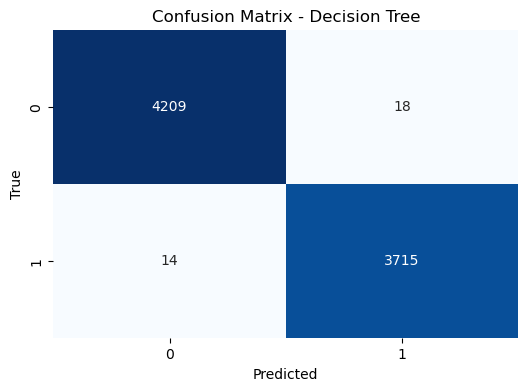

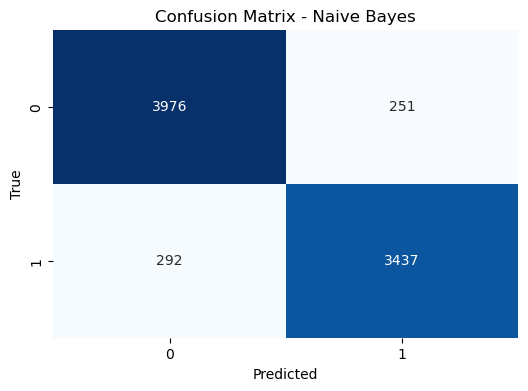

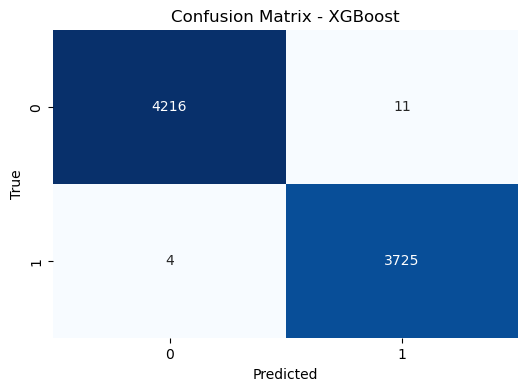

In [46]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Confusion Matrix
cm_xgb = confusion_matrix(y_test, pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



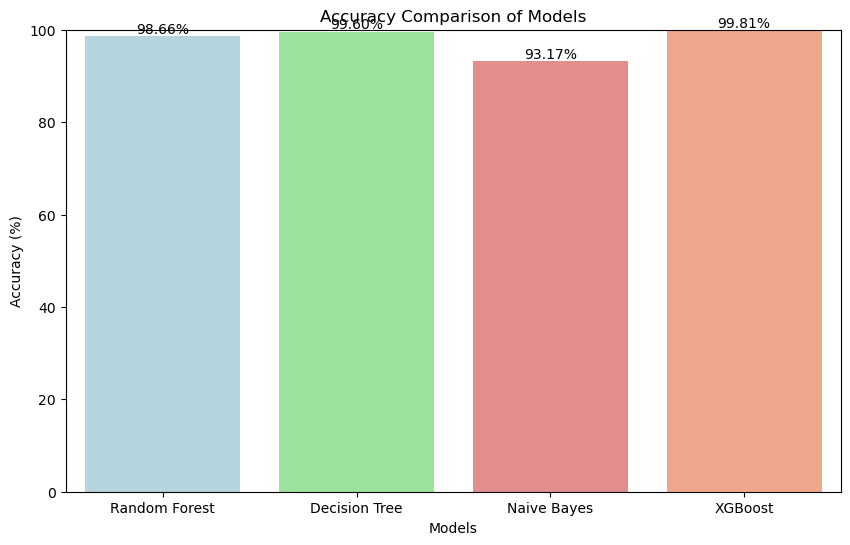

In [48]:
# Bar plot for Accuracy Comparison
models = ['Random Forest', 'Decision Tree', 'Naive Bayes', 'XGBoost']
accuracies = [RandomForest.score(xvector_test, y_test)*100, DecisionTree.score(xvector_test, y_test)*100, NaiveBayes.score(xvector_test, y_test)*100, XGB.score(xvector_test, y_test)*100]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette=colors)
plt.title('Accuracy Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Adjusted to 100 for accuracy percentage
for index, value in enumerate(accuracies):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')
plt.show()
